In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70296 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
model = tf.keras.models.Sequential()

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[112.5   97.5  116.5 ]
   [125.5  110.5  129.5 ]
   [145.5  130.5  149.5 ]
   ...
   [129.75 115.75 138.75]
   [125.5  111.5  134.5 ]
   [124.   110.   133.  ]]

  [[118.25 103.25 122.25]
   [114.5   99.5  118.5 ]
   [ 80.75  65.75  84.75]
   ...
   [121.75 107.75 130.75]
   [126.75 112.75 135.75]
   [131.75 117.75 140.75]]

  [[101.5   86.5  105.5 ]
   [ 93.    78.    97.  ]
   [104.5   89.5  108.5 ]
   ...
   [123.25 109.25 132.25]
   [130.75 116.75 139.75]
   [134.   120.   143.  ]]

  ...

  [[148.5  140.5  161.5 ]
   [166.75 158.75 179.75]
   [173.5  165.5  186.5 ]
   ...
   [159.75 153.75 179.75]
   [160.5  154.5  180.5 ]
   [159.   153.   179.  ]]

  [[172.75 164.75 185.75]
   [159.5  151.5  172.5 ]
   [170.   162.   183.  ]
   ...
   [155.75 149.75 175.75]
   [147.5  141.5  167.5 ]
   [151.   145.   171.  ]]

  [[152.   144.   165.  ]
   [149.25 141.25 162.25]
   [174.   166.   187.  ]
   ...
   [157.5  151.5  177.5 ]
   [153.25 147.25 173.25]
   [152.75 146.75 17

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\CSP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
model.add(Dense(units=38,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1697s 769ms/step - accuracy: 0.4237 - loss: 2.0404 - val_accuracy: 0.8640 - val_loss: 0.4471
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1584s 721ms/step - accuracy: 0.8489 - loss: 0.4775 - val_accuracy: 0.9049 - val_loss: 0.3022
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4140s 2s/step - accuracy: 0.9084 - loss: 0.2829 - val_accuracy: 0.9458 - val_loss: 0.1664
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 21045s 10s/step - accuracy: 0.9400 - loss: 0.1816 - val_accuracy: 0.9416 - val_loss: 0.1780
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1332s 606ms/step - accuracy: 0.9586 - loss: 0.1278 - val_accuracy: 0.9384 - val_loss: 0.1905
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1334s 607ms/step - accuracy: 0.9648 - loss: 0.1057 - val_accuracy: 0.9553 - val_loss: 0.1380
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1385s 630ms/step - accuracy: 0.9717 - loss: 0.0858 - val_accuracy: 0.9506 - val_loss: 0.1494
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1389s 632ms/step 

In [22]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 426s 194ms/step - accuracy: 0.9897 - loss: 0.0313


In [23]:
print(train_loss,train_acc)

0.02695959433913231 0.9914077520370483


In [24]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 118s 214ms/step - accuracy: 0.9656 - loss: 0.1190


In [25]:
print(val_loss,val_acc)

0.11798363924026489 0.9653995037078857


In [26]:
model.save("Trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6244736313819885,
  0.8687976598739624,
  0.9181745648384094,
  0.9440508484840393,
  0.9592864513397217,
  0.9670678377151489,
  0.972957193851471,
  0.978305995464325,
  0.9817485809326172,
  0.9829151034355164],
 'loss': [1.2763938903808594,
  0.4101862609386444,
  0.2511269450187683,
  0.16996628046035767,
  0.12709444761276245,
  0.0997314453125,
  0.08300624787807465,
  0.06683649122714996,
  0.05739564076066017,
  0.053788430988788605],
 'val_accuracy': [0.8640450835227966,
  0.9049055576324463,
  0.9458228945732117,
  0.941611647605896,
  0.9384247660636902,
  0.9552697539329529,
  0.9506032466888428,
  0.9589688181877136,
  0.9623833298683167,
  0.9653995037078857],
 'val_loss': [0.4471169710159302,
  0.3021906912326813,
  0.16638793051242828,
  0.1779668629169464,
  0.1904830038547516,
  0.1380431205034256,
  0.1493675857782364,
  0.13538740575313568,
  0.12437430769205093,
  0.11798365414142609]}

In [28]:
import json
with open("training_hist1.json","w") as f:
    json.dump(training_history.history,f)

In [29]:
training_history.history['val_accuracy']

[0.8640450835227966,
 0.9049055576324463,
 0.9458228945732117,
 0.941611647605896,
 0.9384247660636902,
 0.9552697539329529,
 0.9506032466888428,
 0.9589688181877136,
 0.9623833298683167,
 0.9653995037078857]

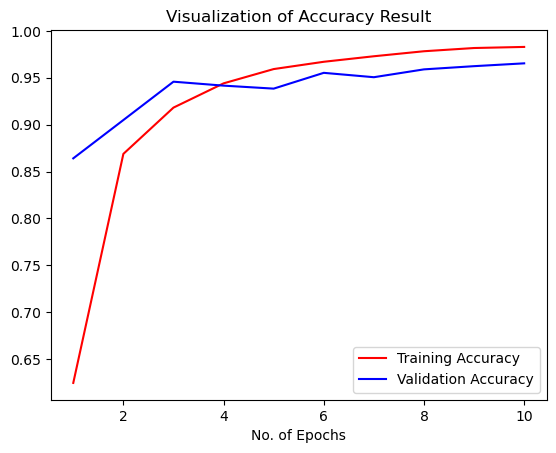

In [30]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [31]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
) 

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

550/550 ━━━━━━━━━━━━━━━━━━━━ 112s 202ms/step


In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.96      0.97      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

In [39]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

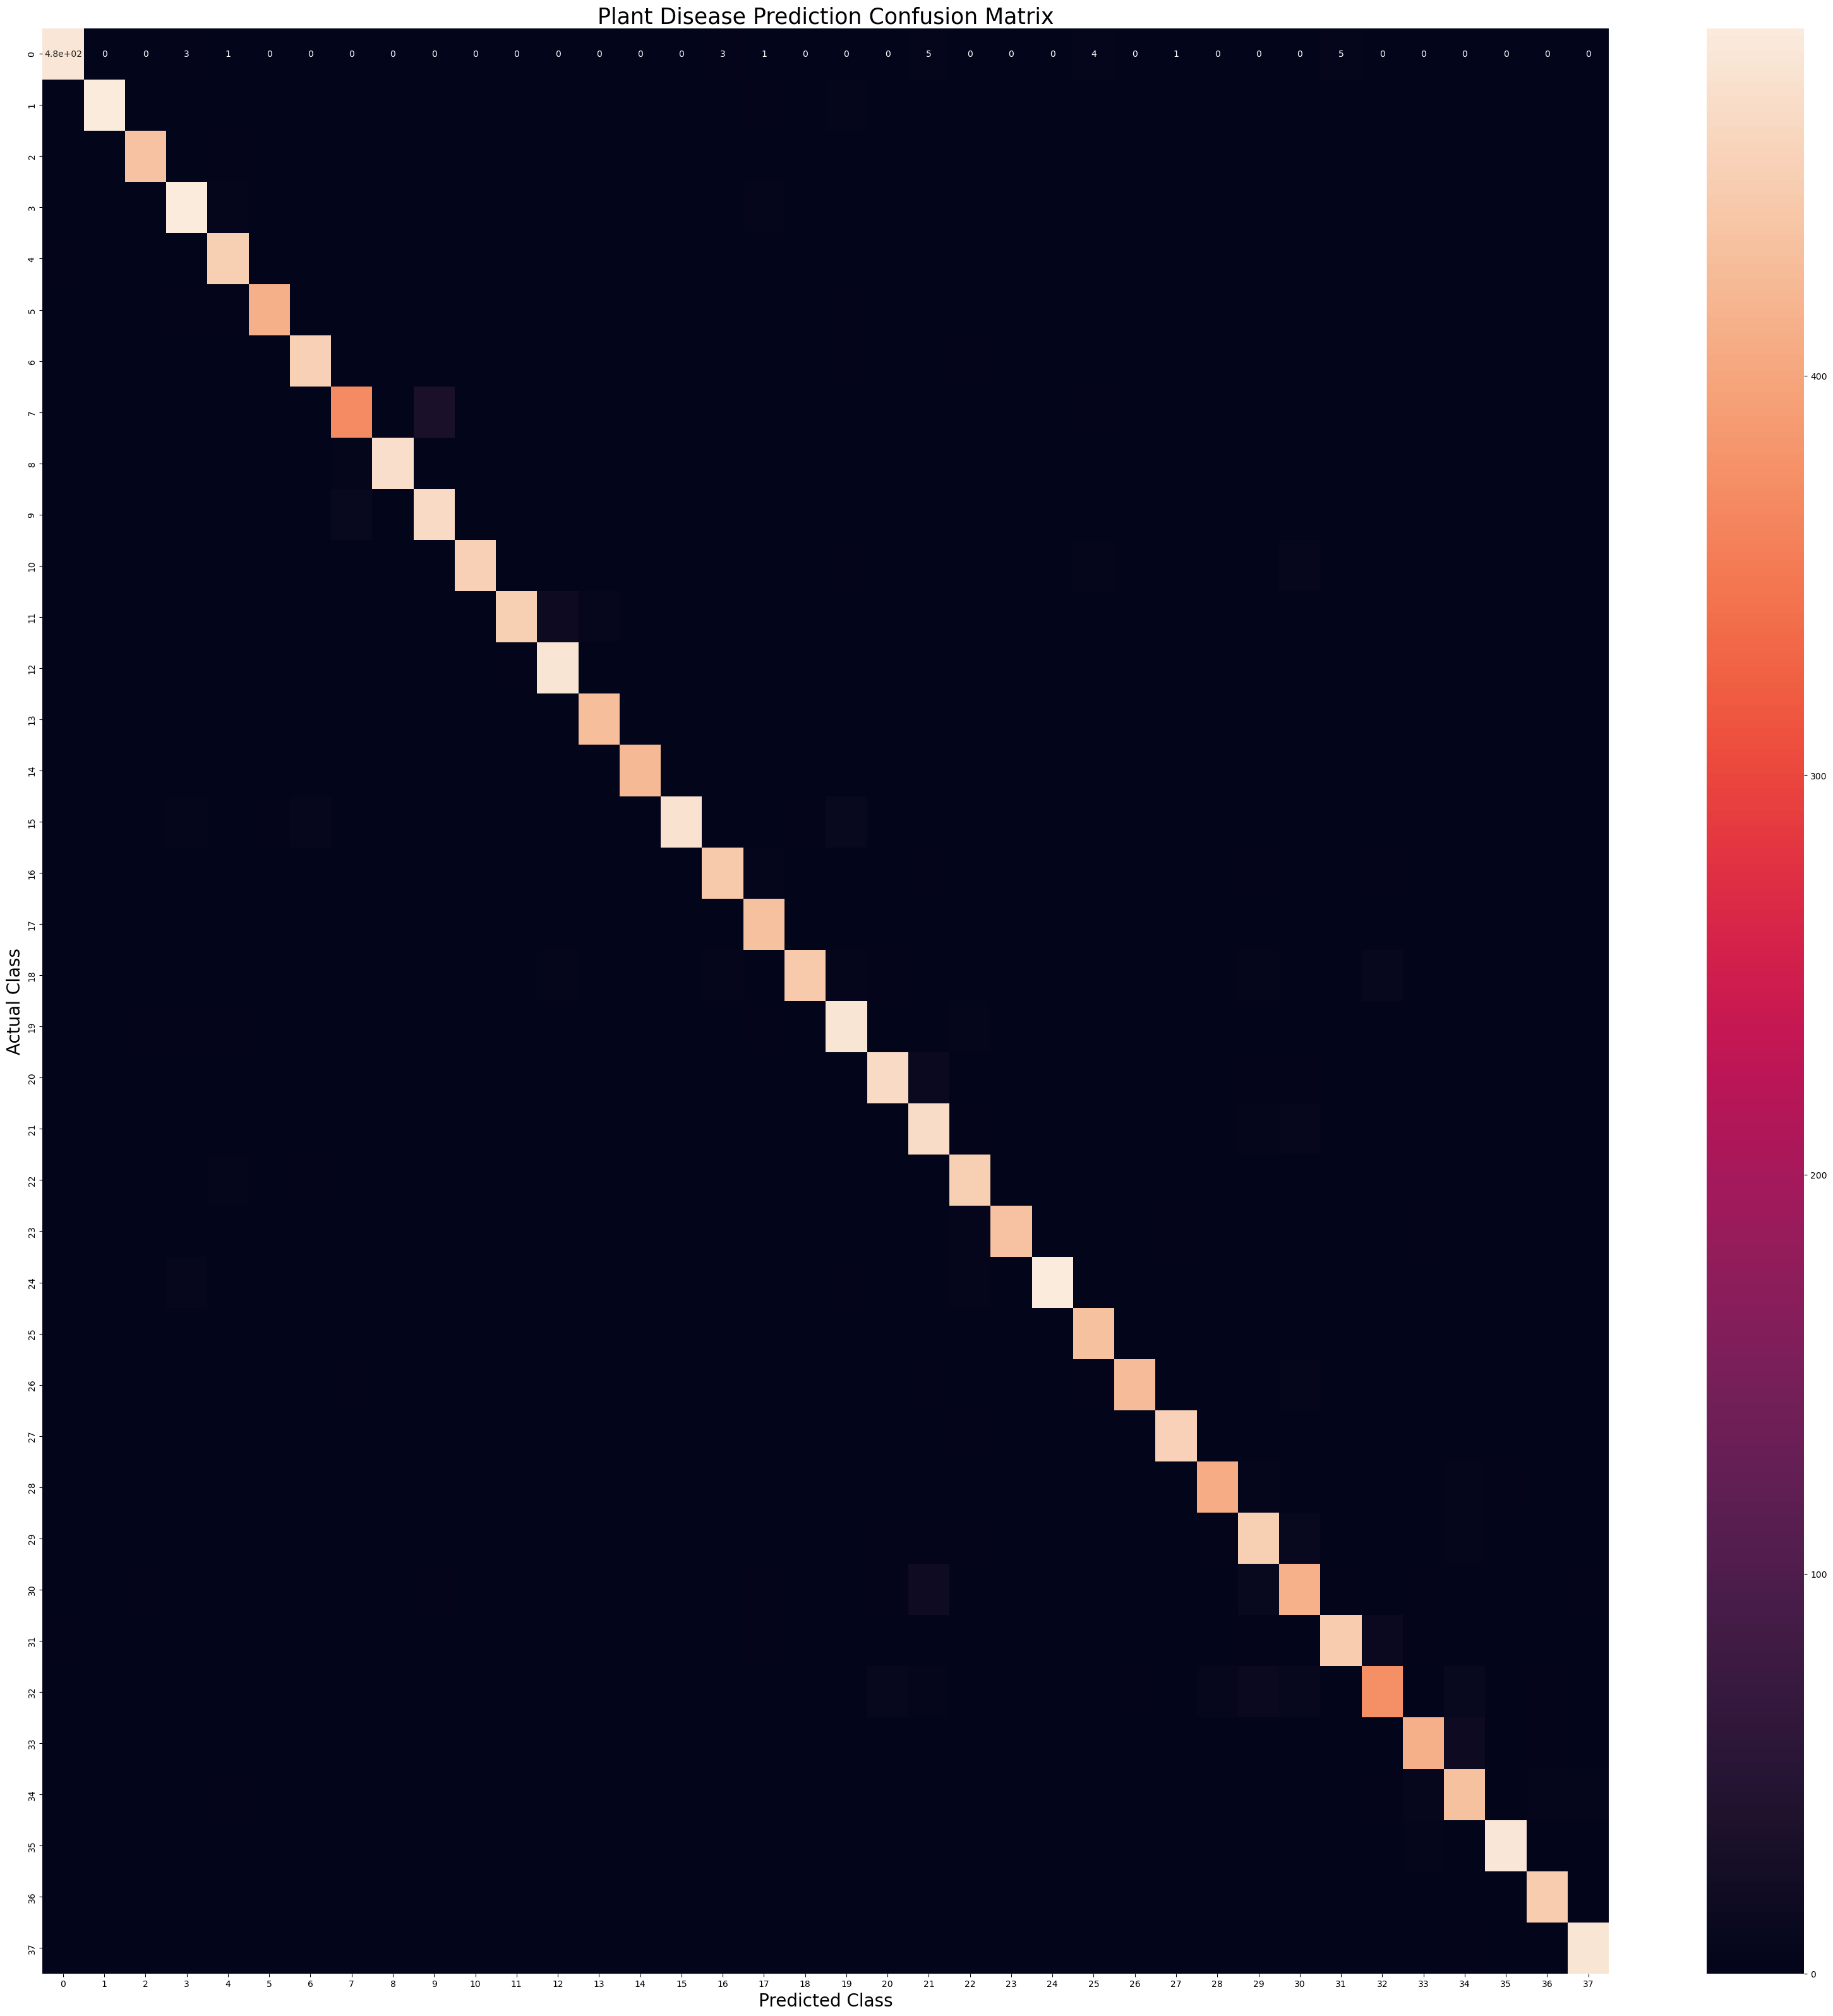

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()